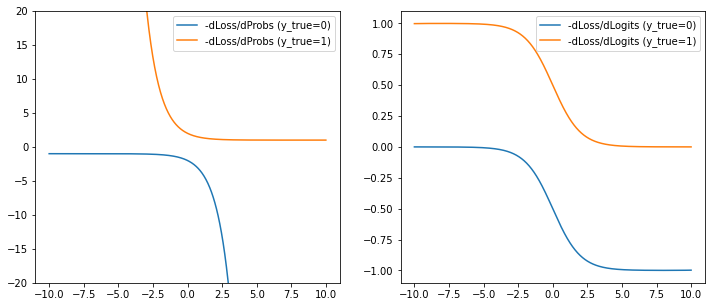

In [114]:
def explore_binary_loss(loss_fn, activation_fn):
    logits = tf.Variable(np.linspace(-10, 10, 1000, dtype=np.float32)[:, None])
    with tf.GradientTape(persistent=True) as tape:
        probs = activation_fn(logits)
        loss0 = loss_fn(tf.zeros((1000, 1)), probs)
        loss1 = loss_fn(tf.ones((1000, 1)), probs)
    dloss0_dprobs, dloss0_dlogits = tape.gradient(loss0, [probs, logits])
    dloss1_dprobs, dloss1_dlogits = tape.gradient(loss1, [probs, logits])
    
    assert dloss0_dprobs is not None
    assert dloss0_dlogits is not None
    assert dloss1_dprobs is not None
    assert dloss1_dlogits is not None
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    ax1.plot(logits[:, 0], -dloss0_dprobs, label='-dLoss/dProbs (y_true=0)')
    ax1.plot(logits[:, 0], -dloss1_dprobs, label='-dLoss/dProbs (y_true=1)')
    ax1.set_ylim(-20, 20)
    ax1.legend()
    
    ax2.plot(logits[:, 0], -dloss0_dlogits, label='-dLoss/dLogits (y_true=0)')
    ax2.plot(logits[:, 0], -dloss1_dlogits, label='-dLoss/dLogits (y_true=1)')
    ax2.set_ylim(-1.1, 1.1)
    ax2.legend()
    
    plt.show()

explore_binary_loss(binary_crossentropy, tf.nn.sigmoid)

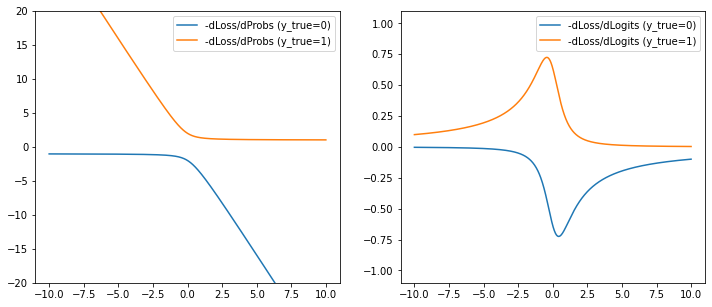

In [115]:
explore_binary_loss(binary_crossentropy, lambda x: tf.math.atan(x)/np.pi + 0.5)

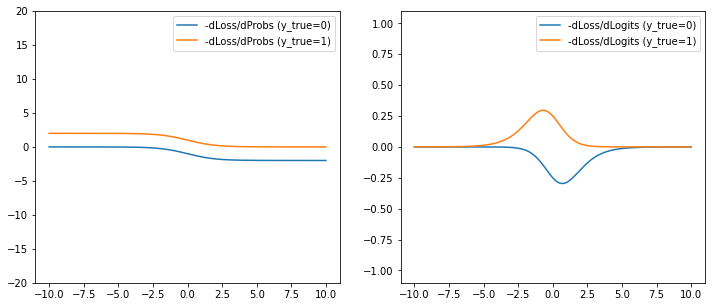

In [116]:
from tensorflow.keras.losses import mse
explore_binary_loss(mse, tf.nn.sigmoid)

In [65]:
!git clone https://github.com/shruti-jadon/Semantic-Segmentation-Loss-Functions

Cloning into 'Semantic-Segmentation-Loss-Functions'...
Updating files:  60% (9/15)
Updating files:  66% (10/15)
Updating files:  73% (11/15)
Updating files:  80% (12/15)
Updating files:  86% (13/15)
Updating files:  93% (14/15)
Updating files: 100% (15/15)
Updating files: 100% (15/15), done.


In [69]:
%run Semantic-Segmentation-Loss-Functions/loss_functions.py
loss_fns = Semantic_loss_functions()

semantic loss functions initialized


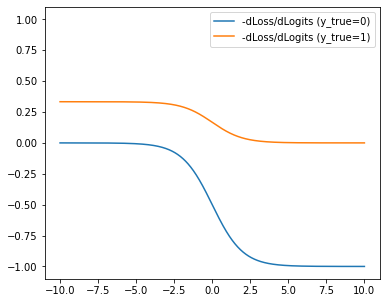

In [127]:
import tensorflow as tf

def explore_binary_loss_from_logits(loss_fn, **kwargs):
    logits = tf.Variable(np.linspace(-10, 10, 1000, dtype=np.float32))
    with tf.GradientTape(persistent=True) as tape:
        loss0 = loss_fn(tf.zeros(1000), logits, **kwargs)
        loss1 = loss_fn(tf.ones(1000), logits, **kwargs)
    dloss0_dlogits = tape.gradient(loss0, logits)
    dloss1_dlogits = tape.gradient(loss1, logits)
    
    assert dloss0_dlogits is not None
    assert dloss1_dlogits is not None
    
    plt.figure(figsize=(6, 5))
    ax = plt.gca()
    
    ax.plot(logits.numpy(), -dloss0_dlogits.numpy(), label='-dLoss/dLogits (y_true=0)')
    ax.plot(logits.numpy(), -dloss1_dlogits.numpy(), label='-dLoss/dLogits (y_true=1)')
    ax.set_ylim(-1.1, 1.1)
    ax.legend()
    
    plt.show()

beta = 0.25
explore_binary_loss_from_logits(tf.nn.weighted_cross_entropy_with_logits, pos_weight=beta/(1-beta))